In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-wid

In [3]:
# soup.find('table', class_="wikitable sortable")
# soup.find('table', class_ = 'wikitable sortable')

In [4]:
table = soup.find_all('table')[1]
table

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [5]:
# world_titles = table.find_all('th')
world_titles = table.find_all('th')

In [6]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [7]:
world_table_titles = [title.text.strip() for title in world_titles]
world_table_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [8]:
column_data = table.find_all('tr')

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(columns = world_table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [11]:
column_data = table.find_all('tr')

In [12]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
#     print(individual_row_data)
    length = len(df)
    df.loc[length] = individual_row_data

In [13]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [14]:
# df.to_csv("Largest Companies.csv")
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [15]:
df1 = pd.read_csv("Largest Companies.csv")
df1

,Unnamed: 0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...,...
95,95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [16]:
df1.shape

(100, 8)

In [17]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [18]:
df.set_index('Rank')

,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
Rank,,,,,,
1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...
96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"


In [38]:
print(df.dtypes)

Rank                      object
Name                      object
Industry                  object
Revenue (USD millions)    object
Revenue growth            object
Employees                 object
Headquarters              object
dtype: object


In [55]:
df3 = df.copy()

In [110]:
df3['Employees'] = df3['Employees'].replace(value = '', to_replace = '[^a-zA-Z0-9]', regex = True)

In [111]:
df3['Revenue (USD millions)'] = df3['Revenue (USD millions)'].replace(value = '', to_replace = '[^a-zA-Z0-9]', regex = True)

In [112]:
# df3['Revenue growth'] = df3['Revenue growth'].replace(value = '', to_replace = '[^a-zA-Z0-9]', regex = True)

In [113]:
df3['Employees'] = df3['Employees'].astype(int)

In [114]:
df3['Revenue (USD millions)'] = df3['Revenue (USD millions)'].astype(int)

In [115]:
# df3['Revenue growth'] = df3['Revenue growth'].astype(int)

In [116]:
df3['Employees'and'Revenue (USD millions)'].dtype

dtype('int32')

In [117]:
df3.dtypes

Rank                      object
Name                      object
Industry                  object
Revenue (USD millions)     int32
Revenue growth             int32
Employees                  int32
Headquarters              object
dtype: object

In [118]:
from matplotlib import pyplot as plt
import numpy as np

In [119]:
%matplotlib inline

In [120]:
df=  df3.copy()

In [121]:
df=df.set_index('Rank')

In [122]:
df.head()

,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
Rank,,,,,,
1,Walmart,Retail,611289,67,2100000,"Bentonville, Arkansas"
2,Amazon,Retail and cloud computing,513983,94,1540000,"Seattle, Washington"
3,ExxonMobil,Petroleum industry,413680,448,62000,"Spring, Texas"
4,Apple,Electronics industry,394328,78,164000,"Cupertino, California"
5,UnitedHealth Group,Healthcare,324162,127,400000,"Minnetonka, Minnesota"


<Axes: xlabel='Rank'>

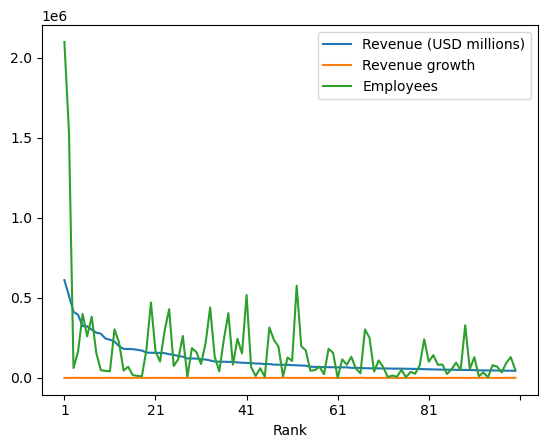

In [123]:
df.plot()

<Axes: title={'center': 'Employees vs Revenues'}, xlabel='Rank'>

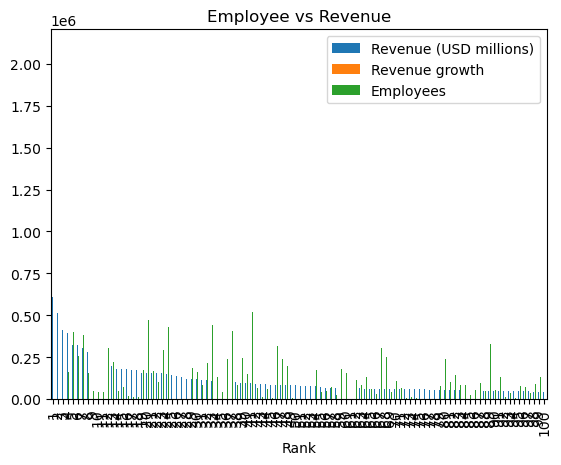

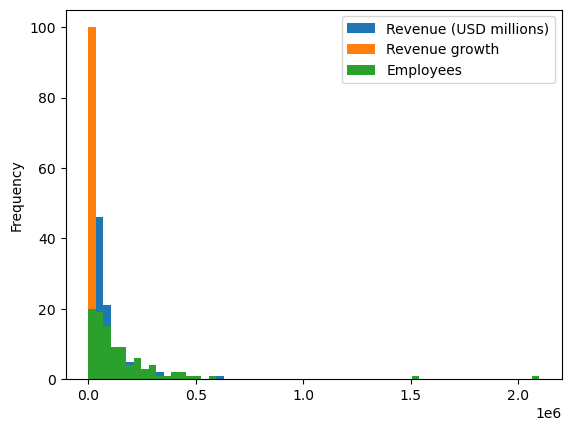

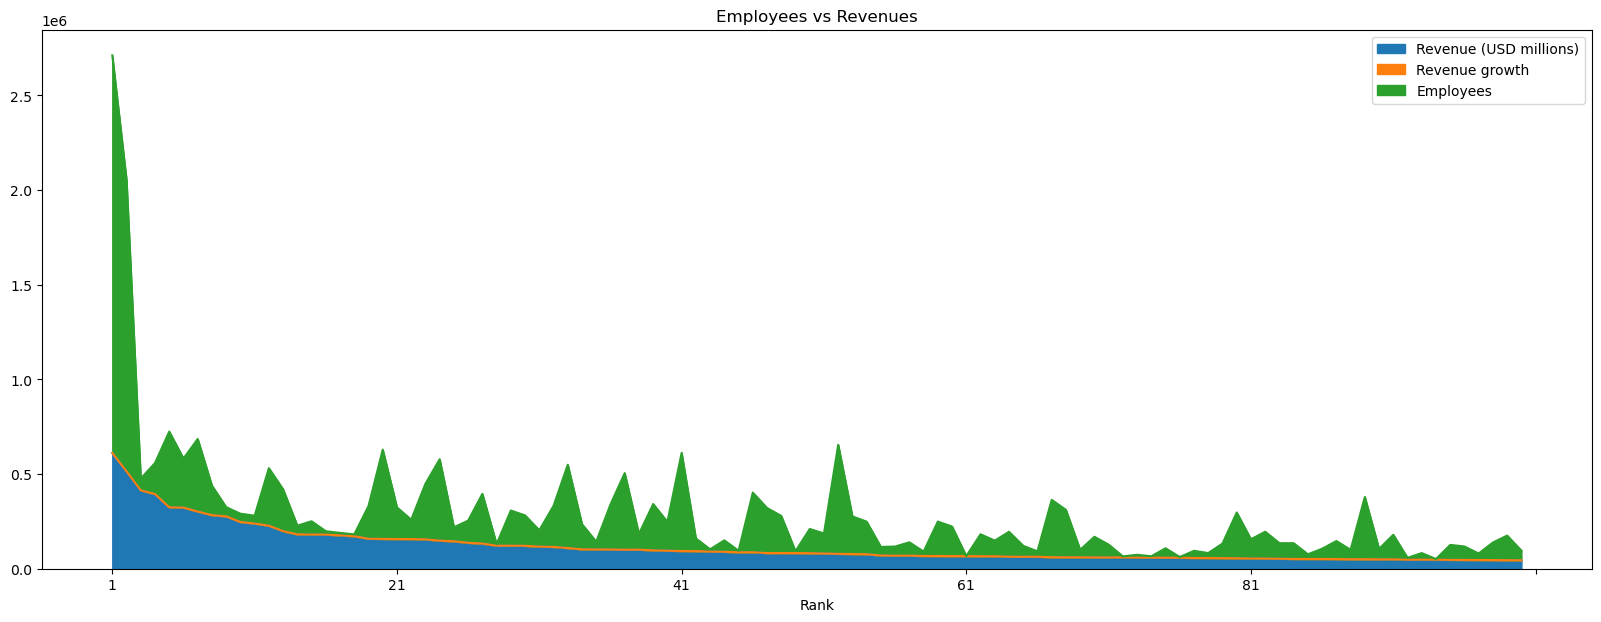

In [140]:
# df['Revenue growth'].plot(kind = 'line')
df.plot(kind = 'bar', title = 'Employee vs Revenue')
df.plot(kind = 'hist', bins = 60)
df.plot.area(figsize = (20,7), title = 'Employees vs Revenues')


array([[<Axes: xlabel='Revenue (USD millions)', ylabel='Revenue (USD millions)'>,
        <Axes: xlabel='Revenue growth', ylabel='Revenue (USD millions)'>,
        <Axes: xlabel='Employees', ylabel='Revenue (USD millions)'>],
       [<Axes: xlabel='Revenue (USD millions)', ylabel='Revenue growth'>,
        <Axes: xlabel='Revenue growth', ylabel='Revenue growth'>,
        <Axes: xlabel='Employees', ylabel='Revenue growth'>],
       [<Axes: xlabel='Revenue (USD millions)', ylabel='Employees'>,
        <Axes: xlabel='Revenue growth', ylabel='Employees'>,
        <Axes: xlabel='Employees', ylabel='Employees'>]], dtype=object)

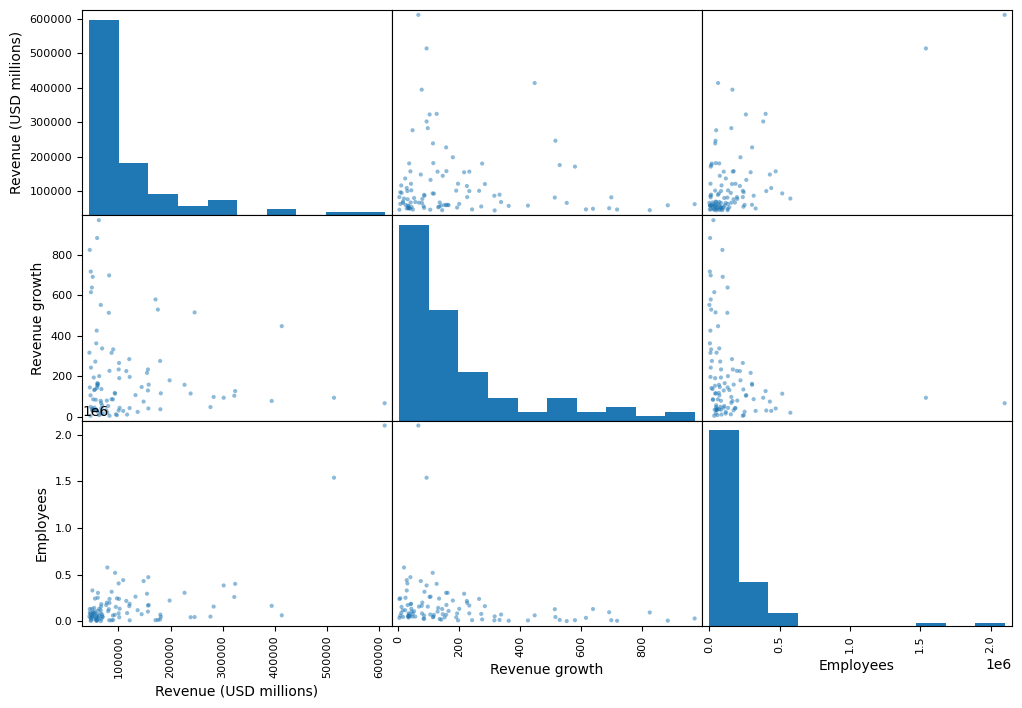

In [137]:
# plt.plot(df.loc[df['Revenue (USD millions)']>10000])
# df.hist(bins= 50, figsize =(20,15))

from pandas.plotting import scatter_matrix
attributes = ['Revenue (USD millions)','Revenue growth', 'Employees']
scatter_matrix(df[attributes], figsize = (12,8))

# <font color = 'red'> This much for today!!!</font>
`Web Scraping by Sudip Pradhan`